## **Importing Necessary Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import pandas as pd
from skimage.filters import prewitt_h,prewitt_v
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
import sklearn.neural_network as nn
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

## **Reading data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/features/features_PCA500.csv', index_col=False)
df_label = pd.read_csv('/content/drive/MyDrive/ML/features/features_PCA500_labels.csv', index_col=False)
df = df.drop(df.columns[[0]], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df), np.array(df_label['0']), test_size=0.2, random_state=42)

## **Reduce dimension of data**

In [ ]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## **Function for plotting data**

In [ ]:
def plot_dataset(x, y):
  labels_x = dict()
  for i in range(len(x)):
    if y[i] in labels_x:
      labels_x[y[i]].append(x[i])
    else:
      labels_x[y[i]] = [x[i]]
  for i in labels_x:
    label_x = np.array(labels_x[i])
    plt.scatter(label_x[:,0], label_x[:,1])
  plt.show()

# *Clustering Models on our own extraction features*

## **Kmeans**

feature plot


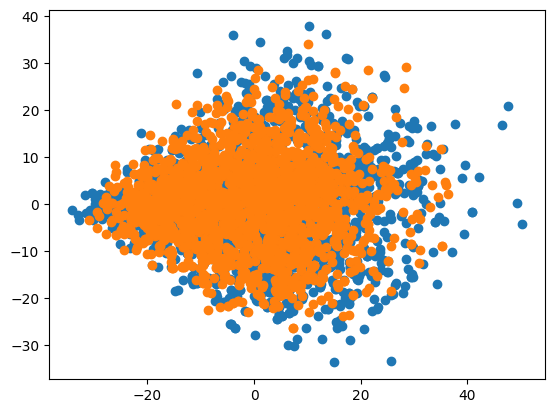

km score for 2 components: -641393.8182893663
Accuracy: -8.245191261949023e-05
km plot 2


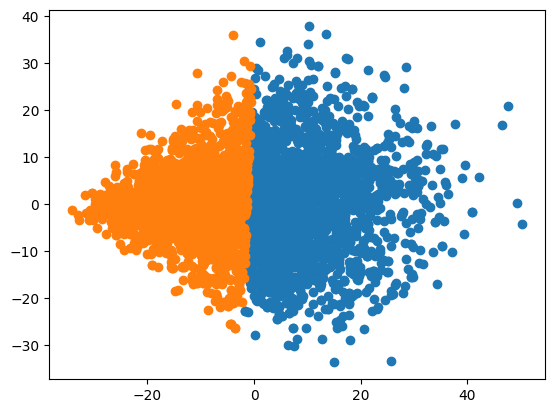

km score for 3 components: -441828.80845198117
Accuracy: -0.0002673417110415848
km plot 3


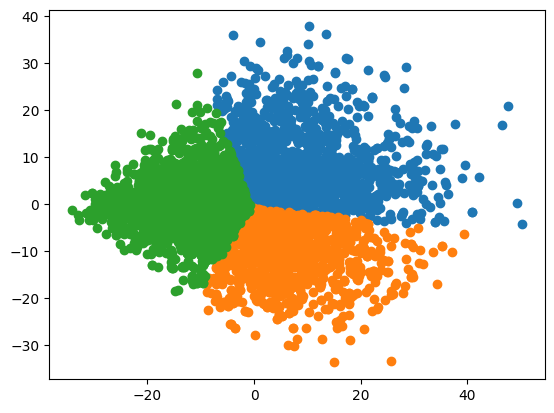

km score for 6 components: -238589.5936871114
Accuracy: 0.0022908460802494165
km plot 6


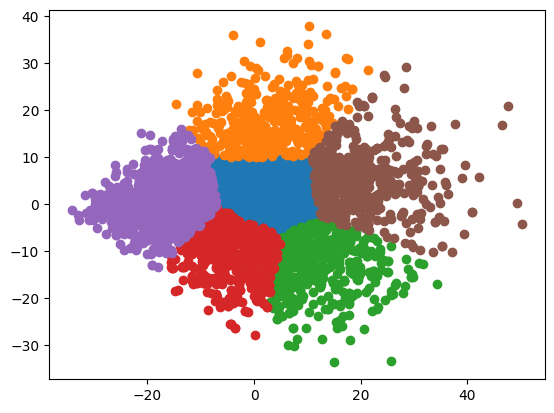

km score for 9 components: -161305.48125743188
Accuracy: 0.0027737551899347027
km plot 9


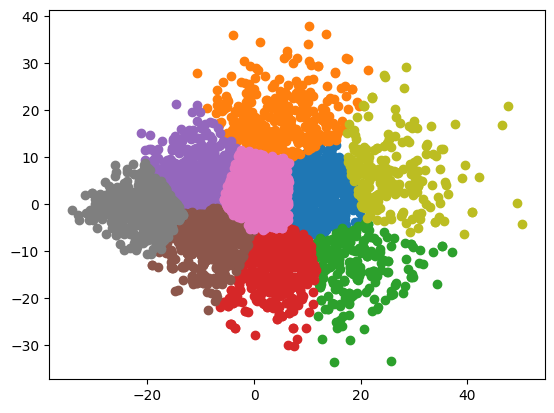

km score for 50 components: -34465.11405995641
Accuracy: 0.001193675623540535
km plot 50


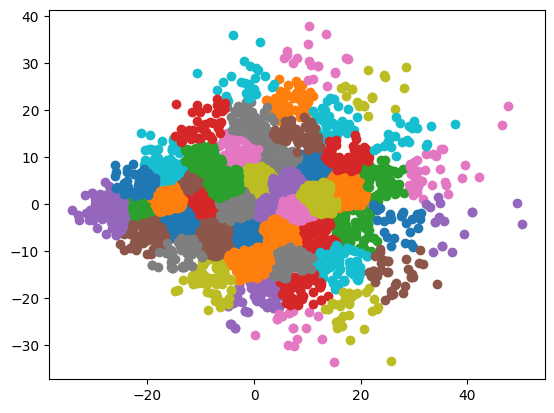

In [ ]:
print("feature plot")
plot_dataset(X_test, y_test)
for i in [2, 3, 6, 9 ,50]:
  km = KMeans(n_clusters=i, n_init=4)
  km = km.fit(X_train)
  y_pred_km = km.predict(X_test)
  print(f"km score for {i} components: {km.score(X_test)}")
  accuracy = adjusted_rand_score(y_test, y_pred_km)
  print("Accuracy:", accuracy)
  print("km plot", i)
  plot_dataset(X_test, y_pred_km)

## **GMM**

feature plot


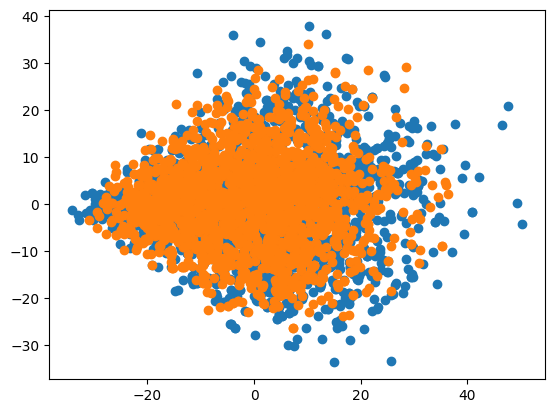

gmm score for 2 components: -7.640388444029263
Accuracy: -0.00019949703657865276
gmm plot 2


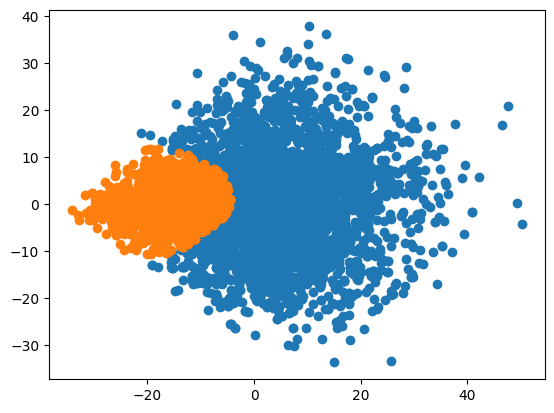

gmm score for 3 components: -7.639590612408032
Accuracy: 0.0003535273943186116
gmm plot 3


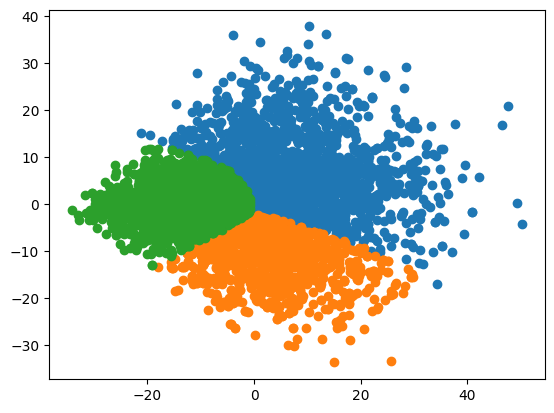

gmm score for 6 components: -7.609119768980506
Accuracy: 0.003230138071901257
gmm plot 6


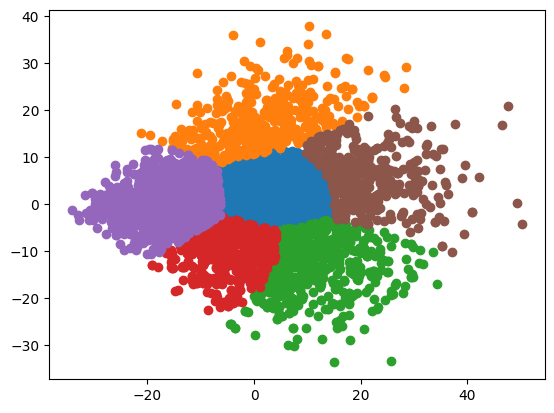

gmm score for 9 components: -7.605248587642947
Accuracy: 0.003259159781412457
gmm plot 9


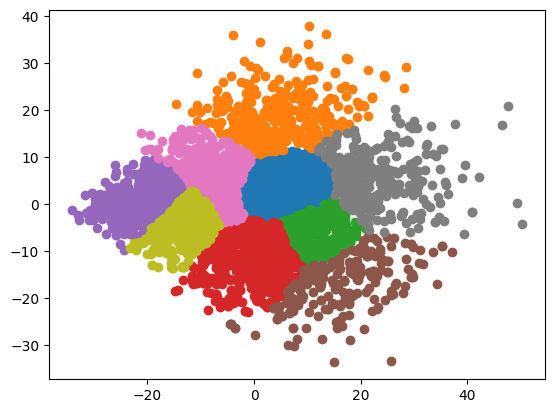

gmm score for 50 components: -7.599796233953542
Accuracy: 0.001306179701784679
gmm plot 50


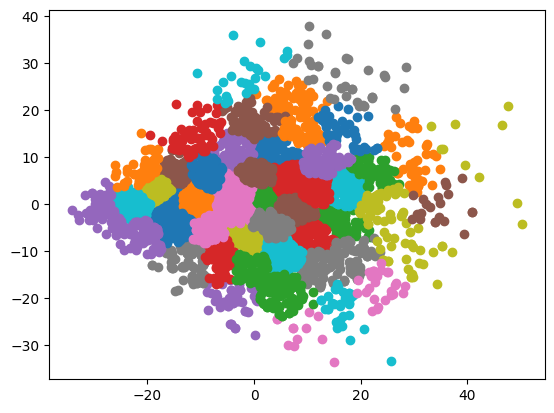

In [ ]:
print("feature plot")
plot_dataset(X_test, y_test)
for i in [2, 3, 6, 9 , 50]:
  gmm = GaussianMixture(n_components=i, n_init=4)
  gmm = gmm.fit(X_train)
  y_pred_gmm = gmm.predict(X_test)
  print(f"gmm score for {i} components: {gmm.score(X_test)}")
  accuracy = adjusted_rand_score(y_test, y_pred_gmm)
  print("Accuracy:", accuracy)
  print("gmm plot", i)
  plot_dataset(X_test, y_pred_gmm)

# *Clustering models based on neural network features extraction*

## **Reading data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Copy of features.csv')
df_label = pd.read_csv('/content/drive/MyDrive/ML/Copy of labels.csv')

In [ ]:
from_source = ['real', 'fake']
from_class = {'real': 0, 'fake': 1}
def get_labels(path):
  #path = listToString(path)
  splited_path = (path.replace("-", "_").replace("sea5", "sea_5").lower().split("_"))

  if (len(splited_path) != 5):
    print(splited_path)
  image_class = splited_path[1]
  #print(image_class)
  if image_class not in from_class:
    print( image_class, path)

  return from_class[image_class]

In [ ]:
labels = list()
for filename in range(len(df_label)):
    if (df_label['810101213_fake_stable_mountain_2.png'][filename].endswith("jpeg") or df_label['810101213_fake_stable_mountain_2.png'][filename].endswith(".jpg")   or
        df_label['810101213_fake_stable_mountain_2.png'][filename].endswith(".png") or df_label['810101213_fake_stable_mountain_2.png'][filename].endswith(".jfif") or
        df_label['810101213_fake_stable_mountain_2.png'][filename].endswith(".webp")):

        try:
          labels.append(get_labels((df_label['810101213_fake_stable_mountain_2.png'][filename])))
        except Exception as e:
          print(e, filename)
    else:
      print(filename)
      print(df_label['810101213_fake_stable_mountain_2.png'][filename])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df), np.array(labels), test_size=0.2, random_state=42)

In [ ]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## **KMeans**

feature plot


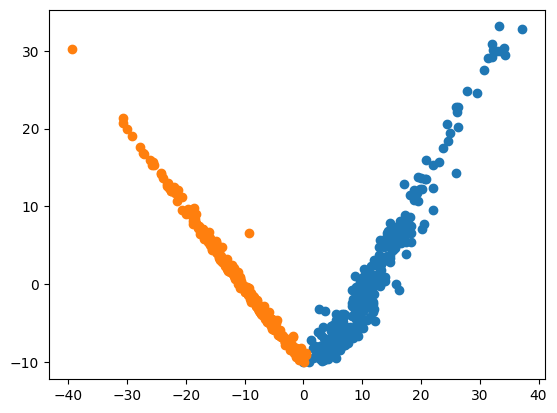

km score for 2 components: -72775.8647539983
Accuracy: 0.9479848100609877
km plot 2


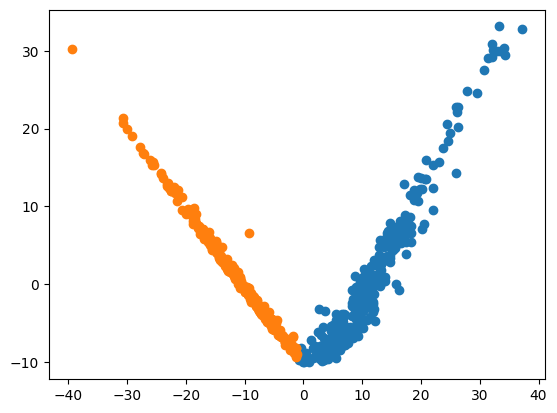

km score for 3 components: -42305.866193683636
Accuracy: 0.3391622919604158
km plot 3


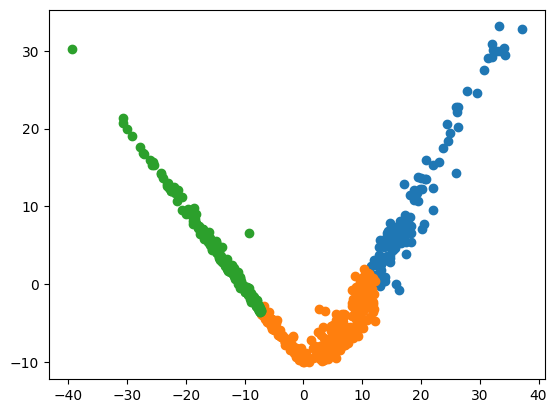

km score for 6 components: -12217.629881476563
Accuracy: 0.4243301498924231
km plot 6


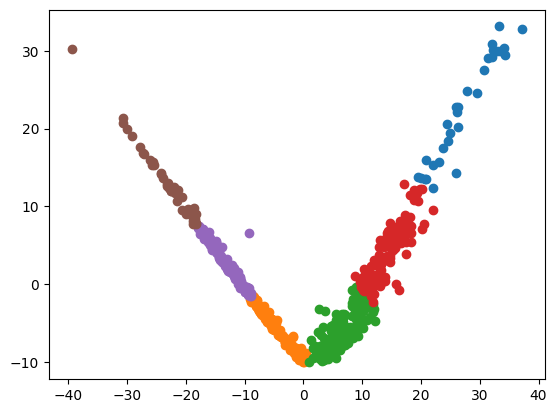

km score for 9 components: -6537.035950883066
Accuracy: 0.29852286839306263
km plot 9


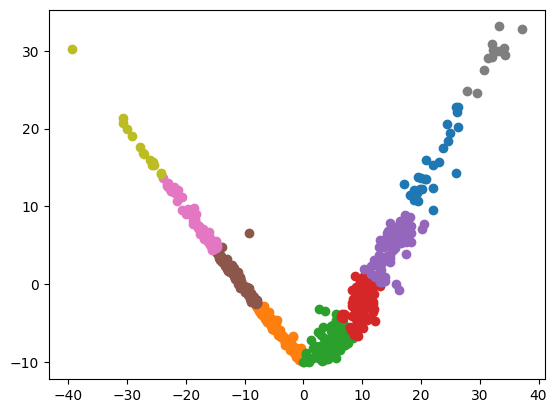

km score for 50 components: -605.0004123879182
Accuracy: 0.056579436651787864
km plot 50


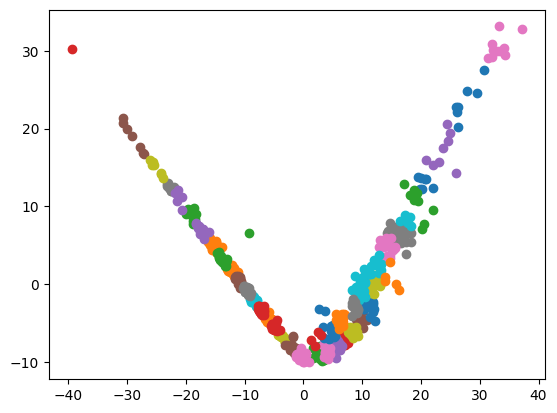

In [ ]:
print("feature plot")
plot_dataset(X_test, y_test)
for i in [2, 3, 6, 9 ,50]:
  km = KMeans(n_clusters=i, n_init=4)
  km = km.fit(X_train)
  y_pred_km = km.predict(X_test)
  print(f"km score for {i} components: {km.score(X_test)}")
  accuracy = adjusted_rand_score(y_test, y_pred_km)
  print("Accuracy:", accuracy)
  print("km plot", i)
  plot_dataset(X_test, y_pred_km)

## **GMM**

feature plot


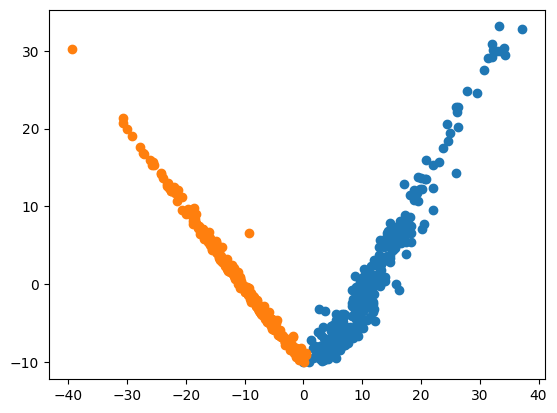

gmm score for 2 components: -5.580856654060582
Accuracy: 0.9825074810920396
gmm plot 2


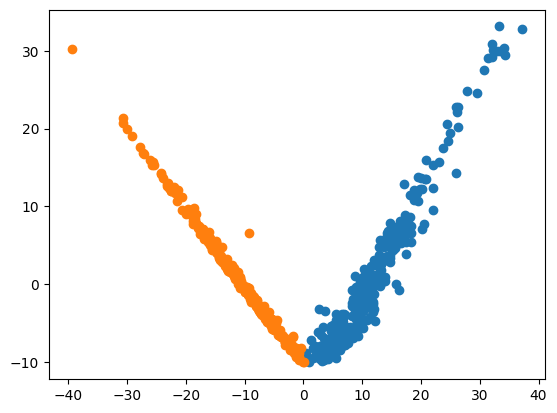

gmm score for 3 components: -5.367460233054576
Accuracy: 0.7248653839923078
gmm plot 3


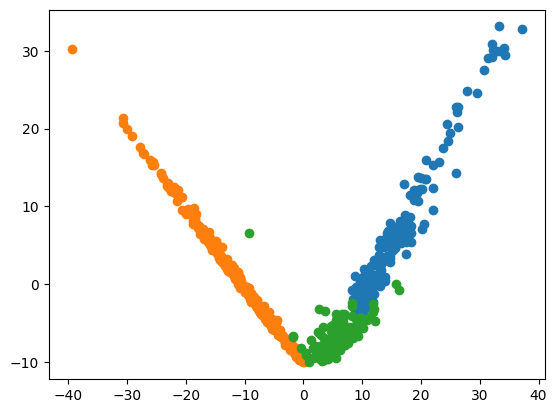

gmm score for 6 components: -5.149912371106543
Accuracy: 0.4529663827658098
gmm plot 6


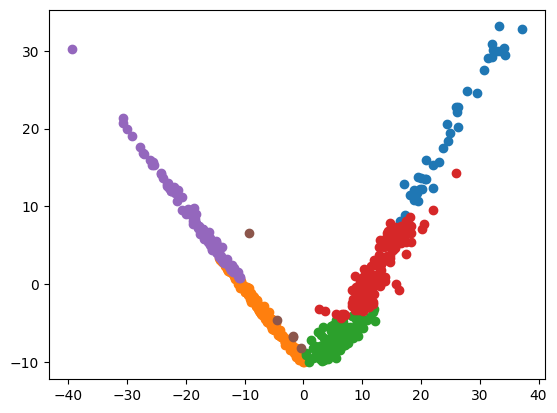

gmm score for 9 components: -5.12310652834269
Accuracy: 0.3346693069603638
gmm plot 9


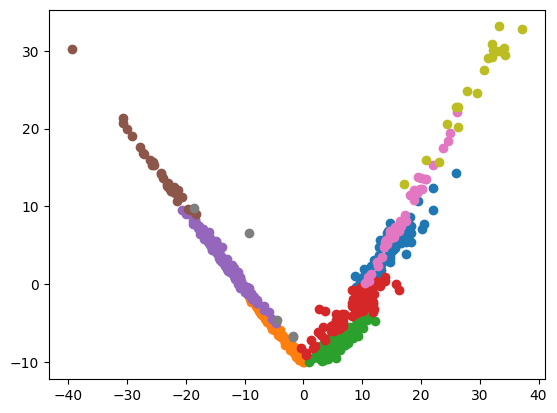

gmm score for 50 components: -5.157266744450655
Accuracy: 0.07141198066135183
gmm plot 50


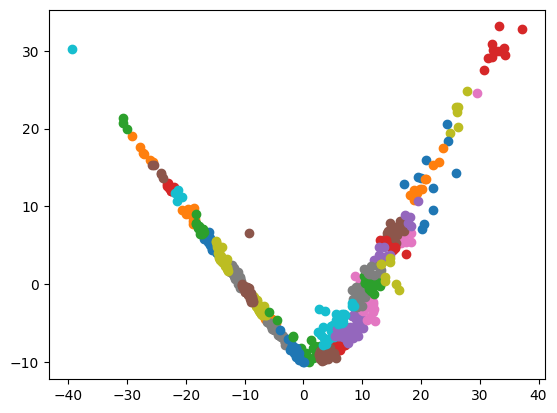

In [ ]:
print("feature plot")
plot_dataset(X_test, y_test)
for i in [2, 3, 6, 9 , 50]:
  gmm = GaussianMixture(n_components=i, n_init=4)
  gmm = gmm.fit(X_train)
  y_pred_gmm = gmm.predict(X_test)
  print(f"gmm score for {i} components: {gmm.score(X_test)}")
  accuracy = adjusted_rand_score(y_test, y_pred_gmm)
  print("Accuracy:", accuracy)
  print("gmm plot", i)
  plot_dataset(X_test, y_pred_gmm)